In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Carregar o dataset
df = pd.read_csv("pre-processed.csv", header=None, names=["index", "label", "text"])

In [ ]:
# Baixar pacotes necessários do NLTK
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
# Função para pré-processamento dos textos
def preprocess_text(text):
    text = str(text)  # Converter explicitamente para string
    text = text.lower()  # Converter para minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remover pontuação
    tokens = word_tokenize(text)  # Tokenização
    stop_words = set(stopwords.words('portuguese'))  # Definir stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remover stop words
    return ' '.join(filtered_tokens)

In [ ]:
# Aplicar a função de pré-processamento ao dataset
df['text'] = df['text'].apply(preprocess_text)

In [ ]:
# Balancear o dataset
df_true = df[df['label'] == 'true']
df_false = df[df['label'] == 'fake']
min_size = min(len(df_true), len(df_false))
df_true_sample = df_true.sample(n=min_size)
df_false_sample = df_false.sample(n=min_size)
df_balanced = pd.concat([df_true_sample, df_false_sample])

print(df_true)


In [ ]:
# Extração de Características com TF-IDF considerando Unigramas, Bigramas e Trigramas
vectorizer = TfidfVectorizer(max_features=5000, min_df=1, max_df=0.95, ngram_range=(1, 3))
X = vectorizer.fit_transform(df_balanced['text']).toarray()
y = df_balanced['label'].values

In [ ]:
# Treinamento do Modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [107]:
# Acurácia do Modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100}%')

Acurácia: 95.27777777777777%


In [ ]:
# Geração de Nuvem de Palavras para termos importantes dos textos VERDADEIROS
feature_names = vectorizer.get_feature_names_out()
sorted_features = clf.feature_importances_.argsort()
important_true_words = [feature_names[index] for index in sorted_features[-100:]]  # Pegar as 100 palavras mais importantes para "true"

wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(' '.join(important_true_words))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras para Notícias Verdadeiras - Código 3892265')
plt.show()

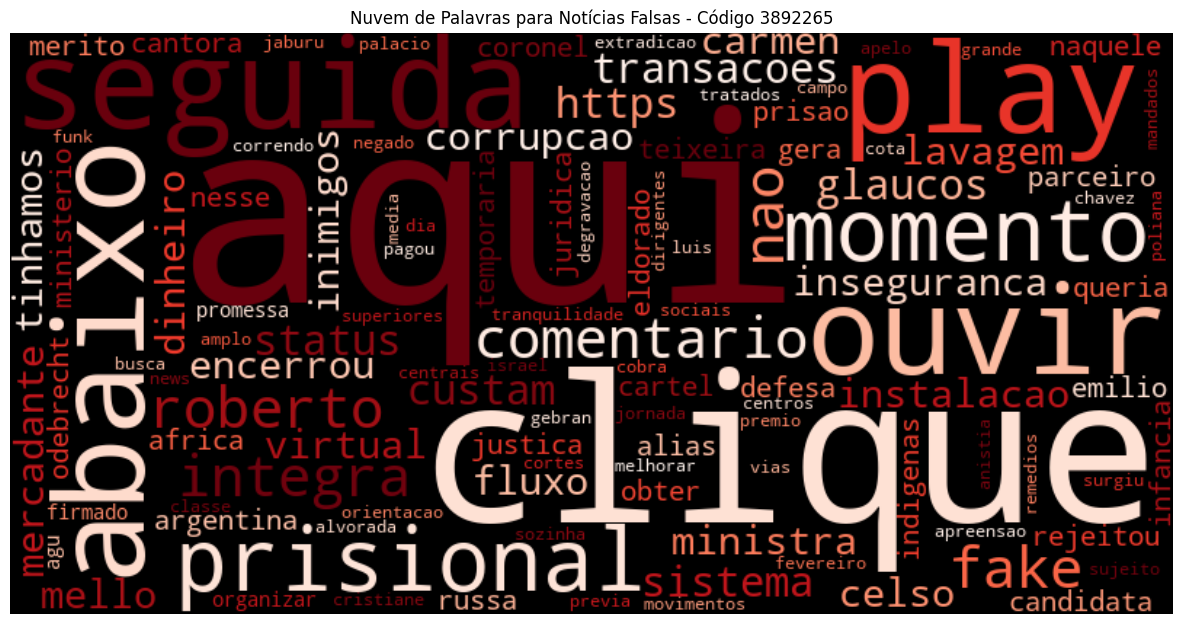

In [108]:
# Geração de Nuvem de Palavras para termos importantes dos textos FALSOS (código repetido para completude)
important_fake_words = [feature_names[index] for index in sorted_features[:100]]  # Pegar as 100 palavras mais importantes para "fake"

wordcloud_fake = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(' '.join(important_fake_words))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras para Notícias Falsas - Código 3892265')
plt.show()

In [110]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer

# Carregar o dataset (substitua 'pre-processed.csv' pelo caminho correto do seu arquivo)
df = pd.read_csv("pre-processed.csv", header=None, names=["index", "label", "text"])

# Baixar pacotes necessários do NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Função para pré-processamento dos textos
def preprocess_text(text):
    text = str(text)  # Converter explicitamente para string
    text = text.lower()  # Converter para minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remover pontuação
    tokens = word_tokenize(text)  # Tokenização
    stop_words = set(stopwords.words('portuguese'))  # Definir stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remover stop words
    return ' '.join(filtered_tokens)

# Aplicar a função de pré-processamento ao dataset
df['text'] = df['text'].apply(preprocess_text)

# Filtrar textos rotulados como "REAL"
df_real = df[df['label'] == 'fake']

# Configurar o TfidfVectorizer para capturar unigramas, bigramas e trigramas
vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Aplicar o vetorizador aos textos "REAL"
X_real = vectorizer.fit_transform(df_real['text'])

# Obter os nomes das features (unigramas, bigramas, trigramas)
features = vectorizer.get_feature_names_out()

# Contar quantos de cada tipo existem
unigrams = [feature for feature in features if len(feature.split()) == 1]
bigrams = [feature for feature in features if len(feature.split()) == 2]
trigrams = [feature for feature in features if len(feature.split()) == 3]

# Calculando a soma total de Unigramas, Bigramas e Trigramas
total_ngrams = len(unigrams) + len(bigrams) + len(trigrams)

print(f"Quantidade de Unigramas: {len(unigrams)}")
print(f"Quantidade de Bigramas: {len(bigrams)}")
print(f"Quantidade de Trigramas: {len(trigrams)}")
print(f"Soma total de Unigramas, Bigramas e Trigramas: {total_ngrams}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Quantidade de Unigramas: 31747
Quantidade de Bigramas: 275228
Quantidade de Trigramas: 350316
Soma total de Unigramas, Bigramas e Trigramas: 657291
